In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [3]:
movies = pd.read_csv("movies.csv", sep=',')

# Définition des variables du moteur de recommendations

In [4]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
# Définition des variables numériques 

numeric = ['num_critic_for_reviews', 'num_voted_users',
        'num_user_for_reviews','imdb_score', 'duration', 
       'budget', 'title_year']

In [6]:
mods = movies[numeric]
mods = mods.apply(lambda x: x.fillna(x.mean()),axis=0)

In [7]:
# transformer les données en array numpy
X = mods.values

In [8]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# ACP

In [9]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# pca.explained_variance_ratio_ nous donne le pourcentage de variance expliquée 

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.3965573  0.18135898]
[0.3965573  0.57791628]


(-7, 5)

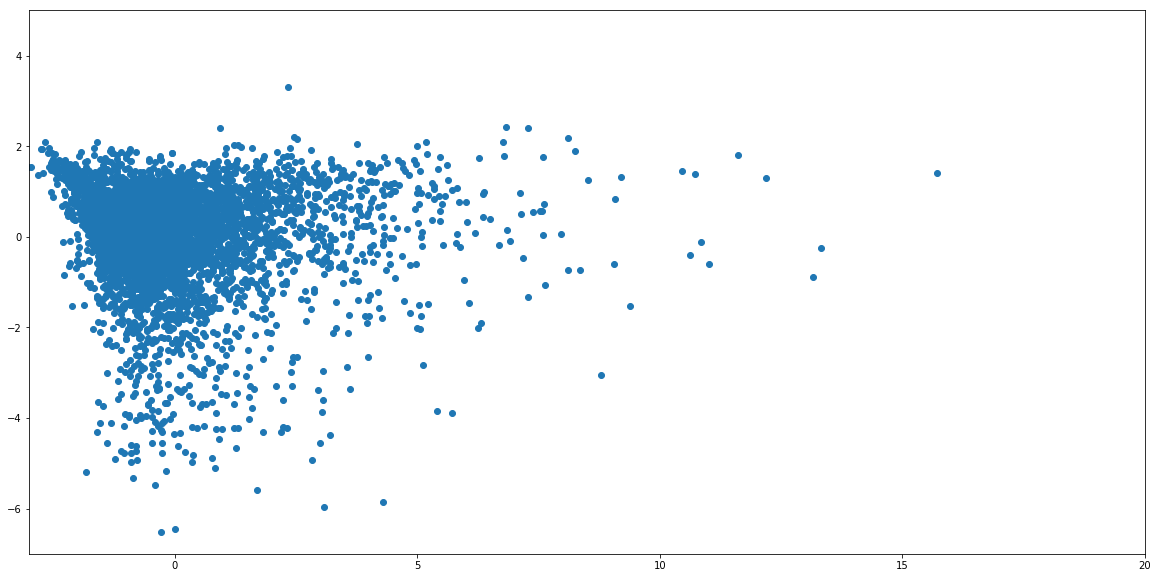

In [14]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.figure(figsize=(20, 10))
plt.scatter(X_projected[:,0], X_projected[:,1])
plt.xlim(xmin=-3, xmax = 20)
plt.ylim(ymin=-7, ymax = 5)

(-0.7, 0.7)

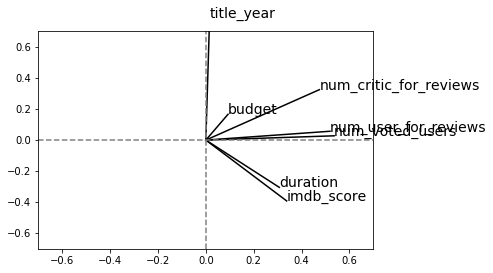

In [18]:
pcs = pca.components_

for i, (x,y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x,y)
    plt.plot([0, x], [0,y], color = 'k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x,y, mods.columns[i], fontsize='14')
    
# Afficher une ligne horizontale y = 0
plt.plot([-0.7, 0.7], [0,0], color = 'grey', ls='--')

# Afficher une ligne verticale x = 0
plt.plot([0,0], [-0.7, 0.7], color = 'grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

# T_SNE

In [19]:
from sklearn.manifold import TSNE
import seaborn as sn
import time

In [20]:
time_start = time.time()
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(X_scaled)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 875.4236307144165 seconds


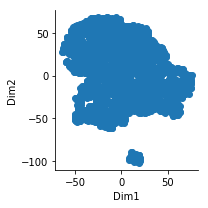

In [21]:
tsne_df = pd.DataFrame(data=tsne_data, columns= ("Dim1", "Dim2"))
sn.FacetGrid(tsne_df).map(plt.scatter, "Dim1", "Dim2")

# Clustering en k-means

Populating the interactive namespace from numpy and matplotlib


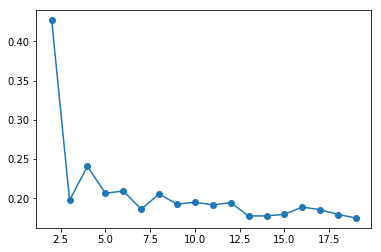

In [16]:
%pylab inline
from sklearn import cluster, metrics

silhouettes = []

for num_clusters in range (2,20):
    cls = cluster.KMeans(n_clusters = num_clusters,
                        n_init = 1, init = 'random')
    cls.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2,20), silhouettes, marker='o')

(-7, 5)

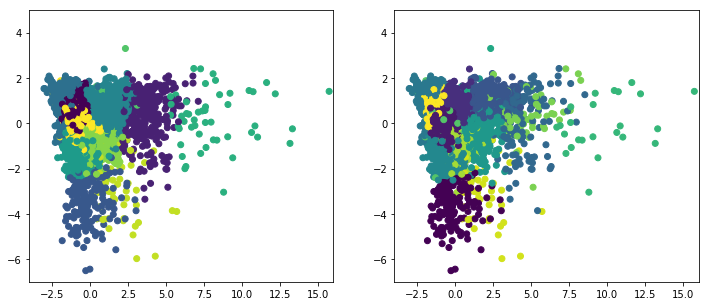

In [20]:
fig = plt.figure(figsize=(12,5))

cls = cluster.KMeans(n_clusters=12)
cls.fit(X_scaled)
ax = fig.add_subplot(121)
ax.scatter(X_projected[:, 0], X_projected[:, 1], c =cls.labels_)
plt.xlim(xmin=-4, xmax = 16)
plt.ylim(ymin=-7, ymax = 5)

cls3 = cluster.KMeans(n_clusters=16)
cls3.fit(X_scaled)
ax = fig.add_subplot(122)
ax.scatter(X_projected[:, 0], X_projected[:, 1], c =cls3.labels_)
plt.xlim(xmin=-4, xmax = 16)
plt.ylim(ymin=-7, ymax = 5)

# Clustering hierarchique

In [24]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams 
from sklearn.cluster import AgglomerativeClustering

import sklearn.metrics as sm

In [25]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [26]:
Z = linkage(X_scaled, 'ward')

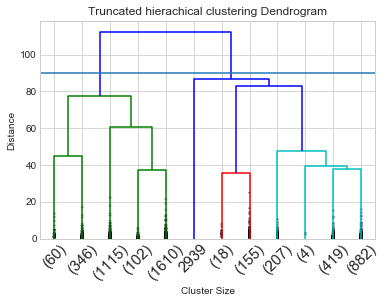

In [27]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15,
          show_contracted=True)
plt.title('Truncated hierachical clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=120)
plt.axhline(y=90)

In [28]:
k = 2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')

Hclustering.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x10867f598>)

# KNN

In [62]:
col = ['num_critic_for_reviews', 'num_voted_users',
        'num_user_for_reviews','imdb_score', 'duration', 
       'budget', 'title_year', 'content_rating']

knn = movies[col]

In [63]:
knn = knn.apply(lambda x: x.fillna(x.mean()),axis=0)

In [64]:
Y = knn.values

In [65]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(algorithm = 'ball_tree')
model_knn.fit(Y)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [67]:
query_index = 1
distances, indices = model_knn.kneighbors(knn.iloc[query_index, :].reshape(1,-1), n_neighbors=6)

for i in range(0, len(distances.flatten())): 
    if i == 0:
        print('Recommendations for {0}:\n' .format(knn.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:' .format(i, knn.index[indices.flatten()[i]], distances.flatten()[i]))
            

Recommendations for 1:

1: 2700, with distance of 446651.5671290206:
2: 5, with distance of 36300924.0869327:
3: 7, with distance of 40000389.013329916:
4: 6, with distance of 42000092.53966069:
5: 8, with distance of 50000000.73245978:


/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


# Modèle final

## Création des nouvelles features

### Genres

In [29]:
movies['genres']

0                         Action|Adventure|Fantasy|Sci-Fi
1                                Action|Adventure|Fantasy
2                               Action|Adventure|Thriller
3                                         Action|Thriller
4                                             Documentary
5                                 Action|Adventure|Sci-Fi
6                                Action|Adventure|Romance
7       Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                                 Action|Adventure|Sci-Fi
9                        Adventure|Family|Fantasy|Mystery
10                                Action|Adventure|Sci-Fi
11                                Action|Adventure|Sci-Fi
12                                       Action|Adventure
13                               Action|Adventure|Fantasy
14                               Action|Adventure|Western
15                        Action|Adventure|Fantasy|Sci-Fi
16                        Action|Adventure|Family|Fantasy
17            

In [31]:
unique_words = set()
for wordlist in movies.genres.str.split('|').values:
    if wordlist is not np.nan:
        unique_words = unique_words.union(set(wordlist))
genreList = list(unique_words)
genreList

['Reality-TV',
 'Game-Show',
 'News',
 'Musical',
 'Documentary',
 'History',
 'Action',
 'Romance',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Mystery',
 'Animation',
 'Western',
 'Thriller',
 'Crime',
 'Family',
 'Biography',
 'Sport',
 'War',
 'Music',
 'Film-Noir',
 'Short',
 'Horror',
 'Comedy',
 'Drama']

In [32]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [33]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))

In [34]:
movies['genres_bin'][0]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [35]:
movies['genres'][0]

'Action|Adventure|Fantasy|Sci-Fi'

### Plot keywords

In [36]:
movies['plot_keywords']

0                  avatar|future|marine|native|paraplegic
1       goddess|marriage ceremony|marriage proposal|pi...
2                     bomb|espionage|sequel|spy|terrorist
3       deception|imprisonment|lawlessness|police offi...
4                                                     NaN
5       alien|american civil war|male nipple|mars|prin...
6               sandman|spider man|symbiote|venom|villain
7       17th century|based on fairy tale|disney|flower...
8       artificial intelligence|based on comic book|ca...
9                        blood|book|love|potion|professor
10      based on comic book|batman|sequel to a reboot|...
11      crystal|epic|lex luthor|lois lane|return to earth
12      action hero|attempted rape|bond girl|official ...
13      box office hit|giant squid|heart|liar's dice|m...
14                  horse|outlaw|texas|texas ranger|train
15      based on comic book|british actor playing amer...
16      brother brother relationship|brother sister re...
17        alie

In [38]:
unique_words = set()
for wordlist in movies.plot_keywords.str.split('|').values:
    if wordlist is not np.nan:
        unique_words = unique_words.union(set(wordlist))
plot_list = list(unique_words)
plot_list

['book club',
 'karma',
 'brother brother relationship',
 'viagra',
 'abuse of power',
 'duplicate earth',
 'dead woman',
 'the doors',
 'life insurance policy',
 'wordplay in title',
 'one man army',
 'malaysia',
 'nascar',
 'nesting grounds',
 'drugged food',
 'shot in the crotch',
 'jewel',
 'irish accent',
 'isolation',
 'unemployment',
 'model',
 'surgery',
 'bicycle',
 'ambassador',
 'massachusetts',
 'voice over',
 'speech therapist',
 'nazi hunter',
 'booby trap',
 'repossession',
 'coors light',
 'future',
 'musical filmmaking',
 'friday',
 'congressman',
 'cmnf scene',
 'dialectics',
 'maid of honor',
 'messiah',
 'skateboarding',
 'worm',
 'instructor',
 'media tycoon',
 'heart attack',
 'wall',
 'wristwatch',
 'potted plant',
 'heaven and hell',
 'electrocuted',
 'escape from jail',
 'zebra',
 'bondage gear',
 'spider man',
 'surrender',
 'falling through a glass roof',
 'waterfall',
 'recording',
 'revival',
 'umbrella',
 'microwave oven',
 'superhero',
 'partnership',
 'm

In [40]:
def binary(words):
    binaryList = []

    for keywords in plot_list:
        if keywords in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [46]:
movies=movies.dropna(subset=['plot_keywords'])

In [47]:
movies['plot_bin'] = movies['plot_keywords'].apply(lambda x: binary(x))

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Actors

In [48]:
movies['cast'] = movies['actor_1_name']+'|'+ movies['actor_2_name']+'|'+ movies['actor_3_name']

/Users/miljanstojiljkovic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
movies['cast']

0                  CCH Pounder|Joel David Moore|Wes Studi
1                Johnny Depp|Orlando Bloom|Jack Davenport
2           Christoph Waltz|Rory Kinnear|Stephanie Sigman
3           Tom Hardy|Christian Bale|Joseph Gordon-Levitt
5               Daryl Sabara|Samantha Morton|Polly Walker
6                 J.K. Simmons|James Franco|Kirsten Dunst
7                   Brad Garrett|Donna Murphy|M.C. Gainey
8       Chris Hemsworth|Robert Downey Jr.|Scarlett Joh...
9              Alan Rickman|Daniel Radcliffe|Rupert Grint
10               Henry Cavill|Lauren Cohan|Alan D. Purwin
11              Kevin Spacey|Marlon Brando|Frank Langella
12        Giancarlo Giannini|Mathieu Amalric|Rory Kinnear
13               Johnny Depp|Orlando Bloom|Jack Davenport
14                  Johnny Depp|Ruth Wilson|Tom Wilkinson
15           Henry Cavill|Christopher Meloni|Harry Lennix
16      Peter Dinklage|Pierfrancesco Favino|Damián Alc...
17      Chris Hemsworth|Robert Downey Jr.|Scarlett Joh...
18            

In [50]:
movies=movies.dropna(subset=['cast'])

In [52]:
unique_names = set()
for namelist in movies.cast.str.split('|').values:
    if namelist is not np.nan:
        unique_names = unique_names.union(set(namelist))     
namesList = list(unique_names)
namesList

['Mark Feuerstein',
 'Rüdiger Vogler',
 'Joe Mantegna',
 'Oliver Hudson',
 'George Lazenby',
 'Ryan Guzman',
 'Violante Placido',
 'Mary Goggin',
 'Charlie Saxton',
 'Daniel Auteuil',
 'Johnny Depp',
 'David Paymer',
 'Nora von Waldstätten',
 'Kelly Brook',
 'Vanilla Ice',
 'Ari Graynor',
 'Philip Baker Hall',
 'Jenifer Lewis',
 'Claudiu Trandafir',
 'Kevin Rankin',
 'Owain Yeoman',
 'Dougray Scott',
 'Dan Hedaya',
 'Barret Oliver',
 'Amy Hill',
 'Claire Adams',
 'Herbert Lom',
 'Chi Chung Lam',
 'Jane Adams',
 'Yuqi Zhang',
 'Julie R. Ølgaard',
 'Doug E. Doug',
 'Harrison Gilbertson',
 'Leonardo DiCaprio',
 'Kelly Ripa',
 'Walter Hendrix III',
 'Wale Ojo',
 'Judge Reinhold',
 'Jennifer Saunders',
 'Agata Trzebuchowska',
 'Nicolas Giraud',
 'Atom Egoyan',
 'Sanaa Lathan',
 'Tim Rose',
 'Jason Hawes',
 'Horatio Sanz',
 'Tara Strohmeier',
 'Jon Stewart',
 'Kurt Fuller',
 'Simon Chandler',
 'Amy Ryan',
 'DeVaughn Nixon',
 'Martin Starr',
 'Igor Zaripov',
 'Ophelia Lovibond',
 'Brittney Po

In [53]:
def binary(name_list):
    binaryList = []
    
    for names in namesList:
        if names in name_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [54]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))

In [55]:
sum(movies['cast_bin'][5])

3

### Director

In [56]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director_name']=movies['director_name'].apply(xstr)

In [57]:
directorList=[]
for i in movies['director_name']:
    if i not in directorList:
        directorList.append(i)

In [58]:
directorList

['James Cameron',
 'Gore Verbinski',
 'Sam Mendes',
 'Christopher Nolan',
 'Andrew Stanton',
 'Sam Raimi',
 'Nathan Greno',
 'Joss Whedon',
 'David Yates',
 'Zack Snyder',
 'Bryan Singer',
 'Marc Forster',
 'Andrew Adamson',
 'Rob Marshall',
 'Barry Sonnenfeld',
 'Peter Jackson',
 'Marc Webb',
 'Ridley Scott',
 'Chris Weitz',
 'Anthony Russo',
 'Peter Berg',
 'Colin Trevorrow',
 'Shane Black',
 'Tim Burton',
 'Brett Ratner',
 'Dan Scanlon',
 'Michael Bay',
 'Joseph Kosinski',
 'John Lasseter',
 'Martin Campbell',
 'Lee Unkrich',
 'McG',
 'James Wan',
 'J.J. Abrams',
 'Baz Luhrmann',
 'Mike Newell',
 'Guillermo del Toro',
 'Steven Spielberg',
 'Peter Sohn',
 'Mark Andrews',
 'Justin Lin',
 'Roland Emmerich',
 'Robert Zemeckis',
 'Lana Wachowski',
 'Pete Docter',
 'Rob Letterman',
 'Jon Favreau',
 'Martin Scorsese',
 'Rob Cohen',
 'David Ayer',
 'Tom Shadyac',
 'Doug Liman',
 'Kevin Reynolds',
 'Stephen Sommers',
 'Rupert Sanders',
 'Robert Stromberg',
 'Matt Reeves',
 'Roland Joffé',
 '

In [59]:
movies=movies.dropna(subset=['director_name'])

In [60]:
def binary(director_list):
    binaryList = []
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [61]:
movies['director_bin'] = movies['director_name'].apply(lambda x: binary(x))

## Fonction de distance

In [100]:
from scipy import spatial

def distance(movie1, movie2):
    a = movies.iloc[movie1]
    b = movies.iloc[movie2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    castA = a['cast_bin']
    castB = b['cast_bin']
    castDistance = spatial.distance.cosine(castA, castB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.hamming(directA, directB)
    
    plotA = a['plot_bin']
    plotB = b['plot_bin']
    plotDistance = spatial.distance.cosine(plotA, plotB)
                                                   
    colorA = a['color']
    colorB = b['color']
    
    colorDistance = spatial.distance.hamming(colorA, colorB)    
    
    scoreA = a['imdb_score']
    scoreB = b['imdb_score']
    
    scoreDistance = spatial.distance.euclidean(scoreA, scoreB)  
                                                                                                      
                                                   
    return (2*genreDistance + 3*directDistance + castDistance + 3*plotDistance + colorDistance + scoreDistance)



In [94]:
distance1(0,1)

5.070591200357147

In [97]:
new_id=list(range(0,movies.shape[0]))
movies['new_id']=new_id

In [165]:
def get_recommendations(movie):
    new_movie=movies[movies['movie_title'].str.contains(movie)].iloc[0].to_frame().T
    distances = []
    
    for index, movie in movies.iterrows():
        if movie['new_id'] != new_movie['new_id'].values[0]:
            dist = distance(new_movie['new_id'].values[0], movie['new_id'])
            distances.append((movie['new_id'], dist))
    
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    
    for x in range(5):
        neighbors.append(distances[x])

    movies_similar = [movies.iloc[neighbors[0][0]]['movie_title'], movies.iloc[neighbors[1][0]]['movie_title'],
                      movies.iloc[neighbors[2][0]]['movie_title'], movies.iloc[neighbors[3][0]]['movie_title'],
                      movies.iloc[neighbors[4][0]]['movie_title']]
            
    return movies_similar

In [166]:
get_recommendations('Avatar')


Recommended Movies: 

Star Trek 
Star Trek II: The Wrath of Khan 
Destiny 
Serenity 
Iron Man 


In [159]:
movies[movies['movie_title']=="Star Trek\xa0"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_bin,plot_bin,cast,cast_bin,director_bin,new_id
159,1.0,J.J. Abrams,518.0,127.0,14000.0,981.0,Leonard Nimoy,26000.0,257704099.0,Action|Adventure|Sci-Fi,...,12000.0,8.0,2.35,19000,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Chris Hemsworth|Leonard Nimoy|Bruce Greenwood,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",158


In [160]:
movies[movies['movie_title']=="Star Trek II: The Wrath of Khan\xa0"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_bin,plot_bin,cast,cast_bin,director_bin,new_id
2876,1.0,Nicholas Meyer,148.0,116.0,120.0,664.0,Kirstie Alley,12000.0,78900000.0,Action|Adventure|Sci-Fi,...,980.0,7.7,2.35,0,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Leonard Nimoy|Kirstie Alley|Nichelle Nichols,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2846


In [161]:
movies[movies['movie_title']=="Destiny\xa0"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_bin,plot_bin,cast,cast_bin,director_bin,new_id
4583,1.0,Joseph Kosinski,4.0,NaN,364.0,567.0,Lauren Cohan,22000.0,NaN,Action|Adventure|Fantasy|Sci-Fi,...,4000.0,8.1,NaN,1000,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Peter Dinklage|Lauren Cohan|Erick Avari,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4470


In [162]:
movies[movies['movie_title']=="Serenity\xa0"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_bin,plot_bin,cast,cast_bin,director_bin,new_id
1321,1.0,Joss Whedon,276.0,119.0,0.0,279.0,Sean Maher,2000.0,25335935.0,Action|Adventure|Sci-Fi|Thriller,...,505.0,8.0,2.35,14000,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Adam Baldwin|Sean Maher|Michael Hitchcock,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1312


In [163]:
movies[movies['movie_title']=="Serenity\xa0"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_bin,plot_bin,cast,cast_bin,director_bin,new_id
1321,1.0,Joss Whedon,276.0,119.0,0.0,279.0,Sean Maher,2000.0,25335935.0,Action|Adventure|Sci-Fi|Thriller,...,505.0,8.0,2.35,14000,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Adam Baldwin|Sean Maher|Michael Hitchcock,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1312


In [164]:
movies[movies['movie_title']=="Avatar\xa0"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_bin,plot_bin,cast,cast_bin,director_bin,new_id
0,1.0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,936.0,7.9,1.78,33000,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CCH Pounder|Joel David Moore|Wes Studi,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
